In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams['font.family']= 'Malgun Gothic'  # 한글 처리
plt.rcParams['axes.unicode_minus'] = False  # -, $ 등등에 표현 특수기호로 버리지 말고 다 써줘라.

In [2]:
# plotly를 위한 임포트
import plotly as ply
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.subplots import make_subplots # 서브플롯을 만들기 위헤
import plotly.graph_objects as go

import chart_studio
chart_studio.tools.set_credentials_file(username='jisu_asiae', api_key='TkLnzkkz6NPV1m3bnVm6')

주요 Event:
* 코로나: 2019년도 12월부터 시작

# read data, preprocessing

In [3]:
df1 = pd.read_csv('./datasets/블록별 성별연령대별 카드소비패턴.csv', encoding='cp949')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   서울시민업종코드(UPJONG_CD)  500 non-null    object
 1   기준년월(YM)             500 non-null    int64 
 2   고객주소블록코드(BLOCK_CD)   500 non-null    int64 
 3   성별(GEDNER)           500 non-null    object
 4   연령대별(AGE)            500 non-null    object
 5   카드이용금액계(AMT_CORR)    500 non-null    int64 
 6   카드이용건수계(USECT_CORR)  500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [4]:
df2 = pd.read_csv('./datasets/카드소비 업종코드.csv', encoding='cp949')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   업종코드(UPJONG_CD)  75 non-null     object
 1   대분류(CLASS1)      75 non-null     object
 2   중분류(CLASS2)      75 non-null     object
 3   소분류(CLASS3)      75 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


In [5]:
df1['년'] = df1['기준년월(YM)'].astype('str').str[:4]
df1['월'] = df1['기준년월(YM)'].astype('str').str[4:]

In [6]:
df1.rename(columns = {'서울시민업종코드(UPJONG_CD)' : '업종코드', '성별(GEDNER)' : '성별', '카드이용금액계(AMT_CORR)' : '금액', '카드이용건수계(USECT_CORR)' : '건수', '연령대별(AGE)' : '연령'}, inplace = True)
df2.rename(columns = {'업종코드(UPJONG_CD)' : '업종코드', '대분류(CLASS1)' : '대분류', '중분류(CLASS2)' : '중분류', '소분류(CLASS3)' : '소분류'}, inplace = True)
df2['업종코드'] = df2['업종코드'].str.upper()
mgdf = pd.merge(df1, df2, on='업종코드', how='left')

mgdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   업종코드                500 non-null    object
 1   기준년월(YM)            500 non-null    int64 
 2   고객주소블록코드(BLOCK_CD)  500 non-null    int64 
 3   성별                  500 non-null    object
 4   연령                  500 non-null    object
 5   금액                  500 non-null    int64 
 6   건수                  500 non-null    int64 
 7   년                   500 non-null    object
 8   월                   500 non-null    object
 9   대분류                 500 non-null    object
 10  중분류                 500 non-null    object
 11  소분류                 500 non-null    object
dtypes: int64(4), object(8)
memory usage: 50.8+ KB


In [7]:
df = mgdf[['대분류','중분류','소분류', '성별', '연령', '년', '월', '금액', '건수']]
df.head()

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
0,유통,할인점/슈퍼마켓,할인점/슈퍼마켓,F,50대,2019,06,48288,65
1,가정생활/서비스,각종요금,통신,M,30대,2016,08,132792,10
2,유통,편의점,편의점,M,50대,2020,09,100600,25
3,요식/유흥,한식,한식,F,30대,2018,05,213876,40
4,가정생활/서비스,서비스,생활서비스,M,30대,2017,05,155930,5


In [8]:
df['대분류'] = df['대분류'].replace(['가전/가구','가정생활/서비스'],'가정생활')
df['대분류'] = df['대분류'].replace('교육/학원','교육')
df['대분류'] = df['대분류'].replace(['스포츠/문화/레저','여행/교통'],'문화')
df['대분류'] = df['대분류'].replace(['주유','자동차'],'교통')
df['대분류'] = df['대분류'].replace(['요식/유흥','음/식료품'],'식품')
df['대분류'] = df['대분류'].replace(['의류/잡화','미용'],'패션')
df['대분류'].value_counts()

식품       142
유통        89
가정생활      55
의료        55
문화        47
전자상거래     45
패션        36
교통        19
교육        12
Name: 대분류, dtype: int64

## 이상치 처리

In [9]:
df[(df['연령']=='10대')&(df['대분류']=='교통')]

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
428,교통,주유,LPG,F,10대,2020,06,8722976,50


In [10]:
df[(df['성별']=='F')&(df['대분류']=='교통')&(df['연령']=='60대')&(df['년']=='2018')]

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
216,교통,자동차서비스/용품,자동차용품,F,60대,2018,10,14336,795


In [11]:
df[(df['대분류']=='식품')&(df['연령']=='10대')&(df['성별']=='F')]

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
232,식품,일식/중식/양식,중식,F,10대,2017,08,11102382,25


In [12]:
df[(df['대분류']=='식품')&(df['연령']=='10대')]

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
11,식품,기타요식,기타요식,M,10대,2018,04,6698074,30
232,식품,일식/중식/양식,중식,F,10대,2017,08,11102382,25


In [13]:
df[(df['대분류']=='식품')&(df['연령']=='10대')&(df['성별']=='F')]

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
232,식품,일식/중식/양식,중식,F,10대,2017,08,11102382,25


In [14]:
df[(df['년']=='2021')&(df['대분류']=='전자상거래')&(df['성별']=='M')&(df['연령']=='20대')]

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
30,전자상거래,전자상거래,결제대행(PG),M,20대,2021,03,50385007,5


In [15]:
# drop
df = df.drop(df[(df['연령']=='10대')&(df['대분류']=='교통')].index.values[0], axis=0)

In [16]:
idxv = df[(df['성별']=='F')&(df['대분류']=='교통')&(df['연령']=='60대')&(df['년']=='2018')].index.values[0]
df = df.drop(idxv, axis=0)

In [17]:
idxv = df[(df['대분류']=='식품')&(df['연령']=='10대')&(df['성별']=='F')].index.values[0]
df = df.drop(idxv, axis=0)

In [18]:
temp = df[(df['년']=='2021')&(df['대분류']=='전자상거래')&(df['성별']=='M')&(df['연령']=='20대')]
idxv =df[(df['년']=='2021')&(df['대분류']=='전자상거래')&(df['성별']=='M')&(df['연령']=='20대')].index.values[0]
df = df.drop(idxv, axis=0)
temp['금액'] = int(temp['금액'].values[0]/4)
df = pd.concat([df, temp], axis=0)
df[(df['년']=='2021')&(df['대분류']=='전자상거래')&(df['성별']=='M')&(df['연령']=='20대')]

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
30,전자상거래,전자상거래,결제대행(PG),M,20대,2021,03,12596251,5


In [19]:
temp_df = df[(df['대분류']=='식품')&(df['연령']=='20대')&((df['소분류']=='한식')|(df['소분류']=='기타음/식료품'))].sort_values('년')
temp_df = temp_df[((temp_df['년']!='2018')|(temp_df['월']!='04'))]
temp_df = temp_df[((temp_df['년']!='2018')|(temp_df['월']!='07'))]
temp_df['연령']= '10대'
temp_df

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
248,식품,한식,한식,M,10대,2016,12,2087953,45
212,식품,한식,한식,F,10대,2017,09,161966,15
376,식품,한식,한식,M,10대,2017,10,27162,5
179,식품,음/식료품,기타음/식료품,M,10대,2019,12,72935,70
436,식품,한식,한식,F,10대,2019,11,35713,91
240,식품,한식,한식,M,10대,2020,12,464772,5
263,식품,한식,한식,F,10대,2020,04,118708,15
420,식품,음/식료품,기타음/식료품,F,10대,2021,05,20623,5


In [20]:
df = pd.concat([df, temp_df], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 420
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류     505 non-null    object
 1   중분류     505 non-null    object
 2   소분류     505 non-null    object
 3   성별      505 non-null    object
 4   연령      505 non-null    object
 5   년       505 non-null    object
 6   월       505 non-null    object
 7   금액      505 non-null    int64 
 8   건수      505 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 39.5+ KB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 420
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류     505 non-null    object
 1   중분류     505 non-null    object
 2   소분류     505 non-null    object
 3   성별      505 non-null    object
 4   연령      505 non-null    object
 5   년       505 non-null    object
 6   월       505 non-null    object
 7   금액      505 non-null    int64 
 8   건수      505 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 39.5+ KB


In [22]:
df=df.sort_values(['년','월'])
df.head()

,대분류,중분류,소분류,성별,연령,년,월,금액,건수
9,식품,제과/커피/패스트푸드,제과점,M,50대,2016,01,155930,5
26,식품,한식,한식,F,30대,2016,01,268099,30
112,식품,제과/커피/패스트푸드,커피전문점,F,30대,2016,01,511551,267
167,문화,여행,면세점,M,70대이상,2016,01,684080,15
180,식품,기타요식,기타요식,M,30대,2016,01,38731,5


In [51]:
df[df['연령']=='10대'].index

Int64Index([], dtype='int64')

In [50]:
df=df.drop(df[df['연령']=='10대'].index,axis=0)

# 성별

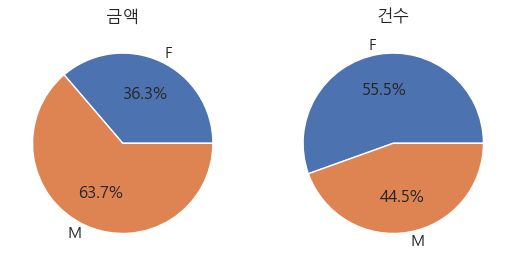

In [23]:
# 분석 결과, 2016-2023년도 까지 금액의 성별에 따른 금액의 총합과 건수의 평균으로 표시
# 건수의 경우, 여성이 높으나 금액은 남성이 높음.
meandata = df.groupby('성별')['금액'].mean()
ratio1 = meandata.values
labels1 = meandata.index.values

meandata2 = df.groupby('성별')['건수'].mean()
ratio2 = meandata2.values
labels2 = meandata2.index.values

plt.subplot(1,2,1)
plt.title('금액')
plt.pie(ratio1, labels=labels1, autopct='%.1f%%')

plt.subplot(1,2,2)
plt.title('건수')
plt.pie(ratio2, labels=labels2, autopct='%.1f%%')

plt.show()

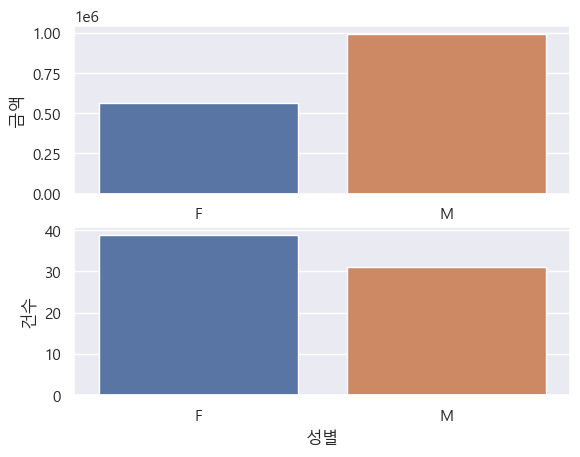

In [24]:
gdf = df.groupby('성별')[['금액', '건수']].mean().sort_index()
gdf = gdf.reset_index()

plt.subplot(2,1,1)
sns.barplot(data=gdf, x="성별", y="금액") 
plt.subplot(2,1,2)
sns.barplot(data=gdf, x="성별", y="건수") 
plt.show()

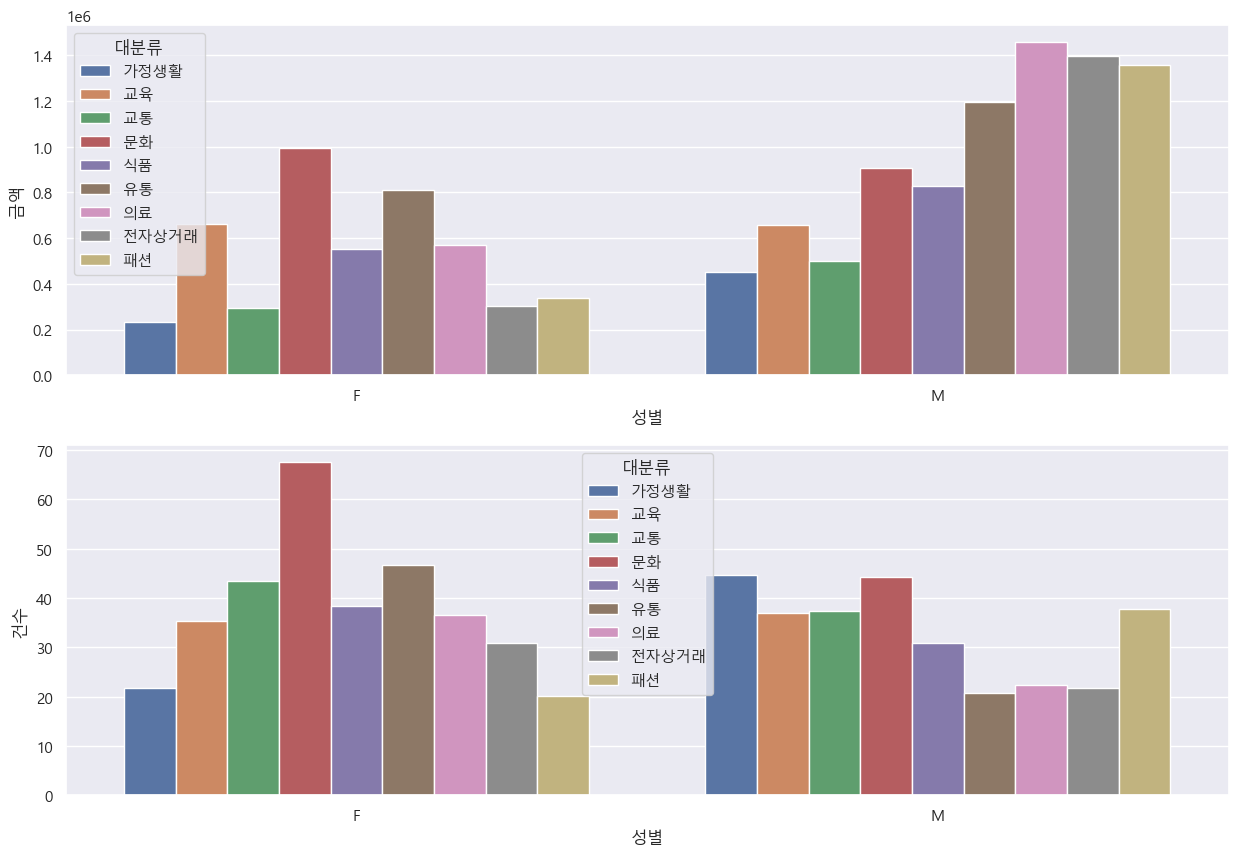

In [25]:
# 성별에 따른 금액과 건수를 대분류로 나눈 결과
# 남성의 경우 전자상거래에서 소비 금액이 아주 큼.
# 여성의 경우 교통에서 결제 건수가 많은 것으로 나타남. ??  --> 해당 이유 파악 필요.
gdf = df.groupby(['성별', '대분류'])[['금액', '건수']].mean().sort_index()
gdf = gdf.reset_index()

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(data=gdf, x="성별", y="금액", hue='대분류') 
plt.subplot(2,1,2)
sns.barplot(data=gdf, x="성별", y="건수", hue='대분류') 
plt.show()

# 연령별

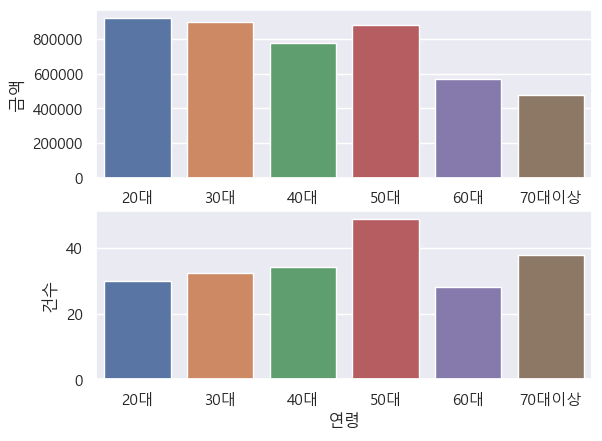

In [52]:
# 연령별, 금액, 건수
# 10대의 소비 금액이 높음.
# 건수의 경우 50개의 소비 건수가 가장 높으나, 금액은 높지 않음.
# 즉, 50개 소비 패턴이 상대적으로, 금액이 적은 소비를 자주 하는 것으로 보임.

gdf = df.groupby('연령')[['금액', '건수']].mean().sort_index()

plt.subplot(2,1,1)
sns.barplot(data=gdf, x=gdf.index, y="금액") 
plt.subplot(2,1,2)
sns.barplot(data=gdf, x=gdf.index, y="건수") 
plt.show()

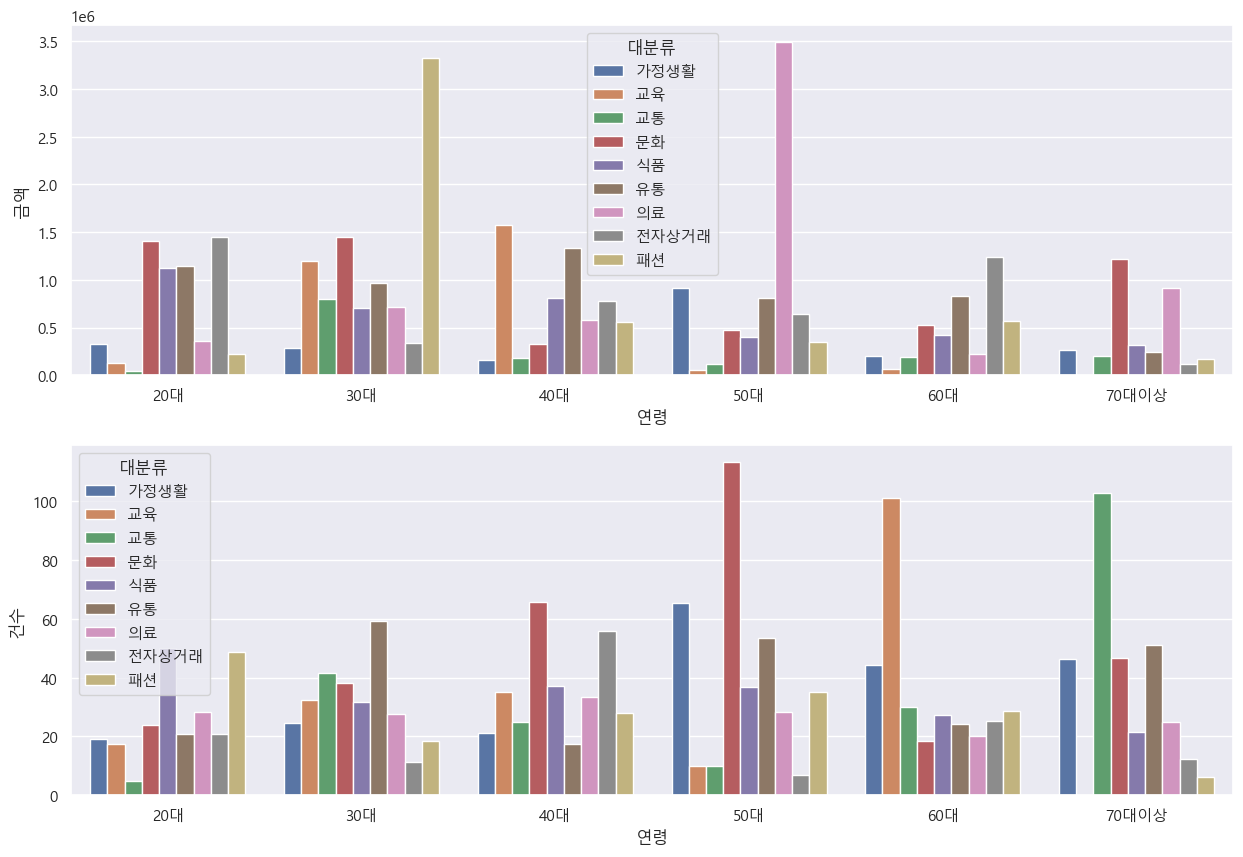

In [53]:
gdf = df.groupby(['연령', '대분류'])[['금액', '건수']].mean().sort_index()
gdf = gdf.reset_index()

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(data=gdf, x='연령', y="금액", hue='대분류') 
plt.subplot(2,1,2)
sns.barplot(data=gdf, x='연령', y="건수", hue='대분류') 
plt.show()

# 10대의 교통과 식품 소비 금액이 매우 높음. 교통(자동차, 주유)이 높게 나오는 근거가 부족. 
# 20대의 전자상거래, 소비금액이 높고, 50대의 의료 비용이 높음.
# 60~70대의 경우, 교통 소비 금액은 높지 않으나, 건수는 높게 나옴. 교통에 적은 금액을 자주 사용하는 것으로 보임.

# 아래부터

In [28]:
df.columns

Index(['대분류', '중분류', '소분류', '성별', '연령', '년', '월', '금액', '건수'], dtype='object')

# 연도별

---

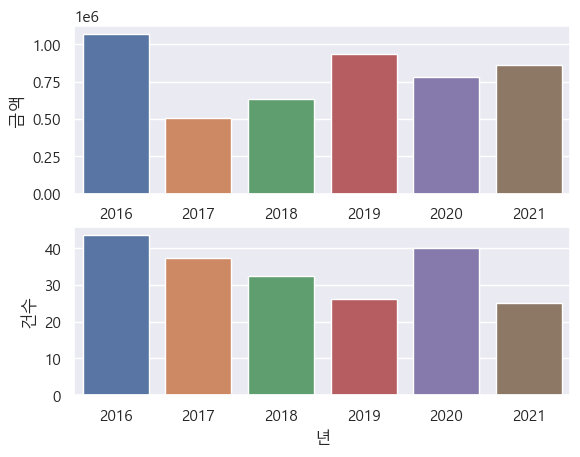

In [54]:
# 연도별 금액, 건수
# 2021년도, 건수는 높지 않으나, 금액이 높게 나옴.  (2021년도에 금액이 큰 소비가 발생함.)
# 2016년도에 금액과 건수 모두 높았다.
# 2021년도의 겨우 건수는 적으나, 금액이 높음. 2021년도에 사람들이 금액이 큰 소비를 한듯함.
# 매년 평균적으로 여성의 건수
gdf = df.groupby('년')[['금액', '건수']].mean().sort_index()
gdf = gdf.reset_index()

plt.subplot(2,1,1)
sns.barplot(data=gdf, x='년', y="금액") 
plt.subplot(2,1,2)
sns.barplot(data=gdf, x='년', y="건수") 
plt.show()

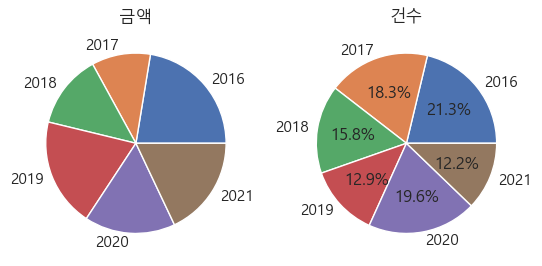

In [78]:
meandata = df.groupby('년')['금액'].mean()
ratio1 = meandata.values
labels1 = meandata.index.values

meandata2 = df.groupby('년')['건수'].mean()
ratio2 = meandata2.values
labels2 = meandata2.index.values

plt.subplot(1,2,1)
plt.title('금액')
plt.pie(ratio1, labels=labels1)
# autopct='%.1f%%'

plt.subplot(1,2,2)
plt.title('건수')
plt.pie(ratio2, labels=labels2, autopct='%.1f%%')

plt.show() 


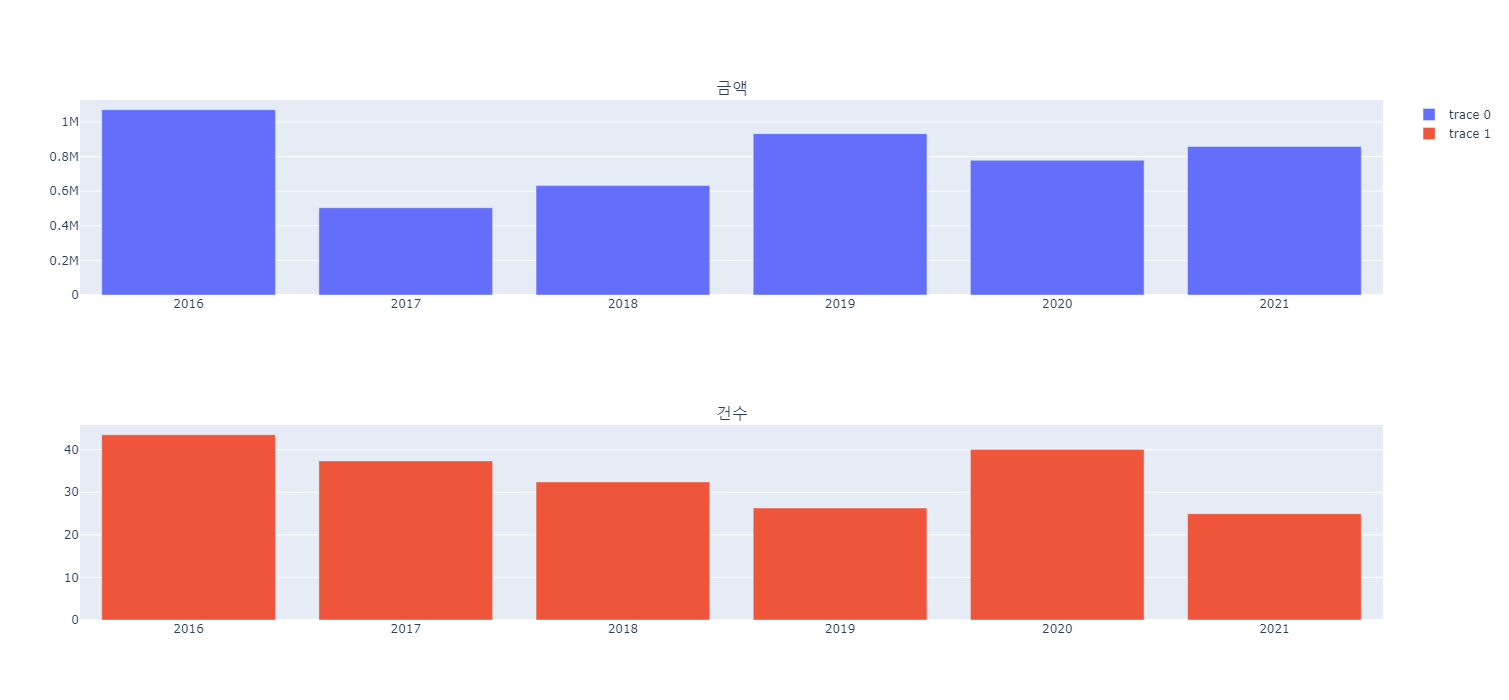

In [56]:
fig = make_subplots(rows=2, subplot_titles=['금액' , '건수'])

x_year = df['년'].unique()
y_data2 = df.groupby('년')['건수'].mean()
y_data = df.groupby('년')['금액'].mean()

fig.add_trace( go.Bar(x=x_year ,y=y_data),1, 1)
fig.add_trace( go.Bar(x=x_year, y=y_data2), 2,1)

fig.update_layout(width=600, height=700)


plotly_iframe_width = "500px"
plotly_iframe_height = "300px"
py.plot(fig, filename = 'year_mc')
fig.show()

---

## 연도별 대분류별

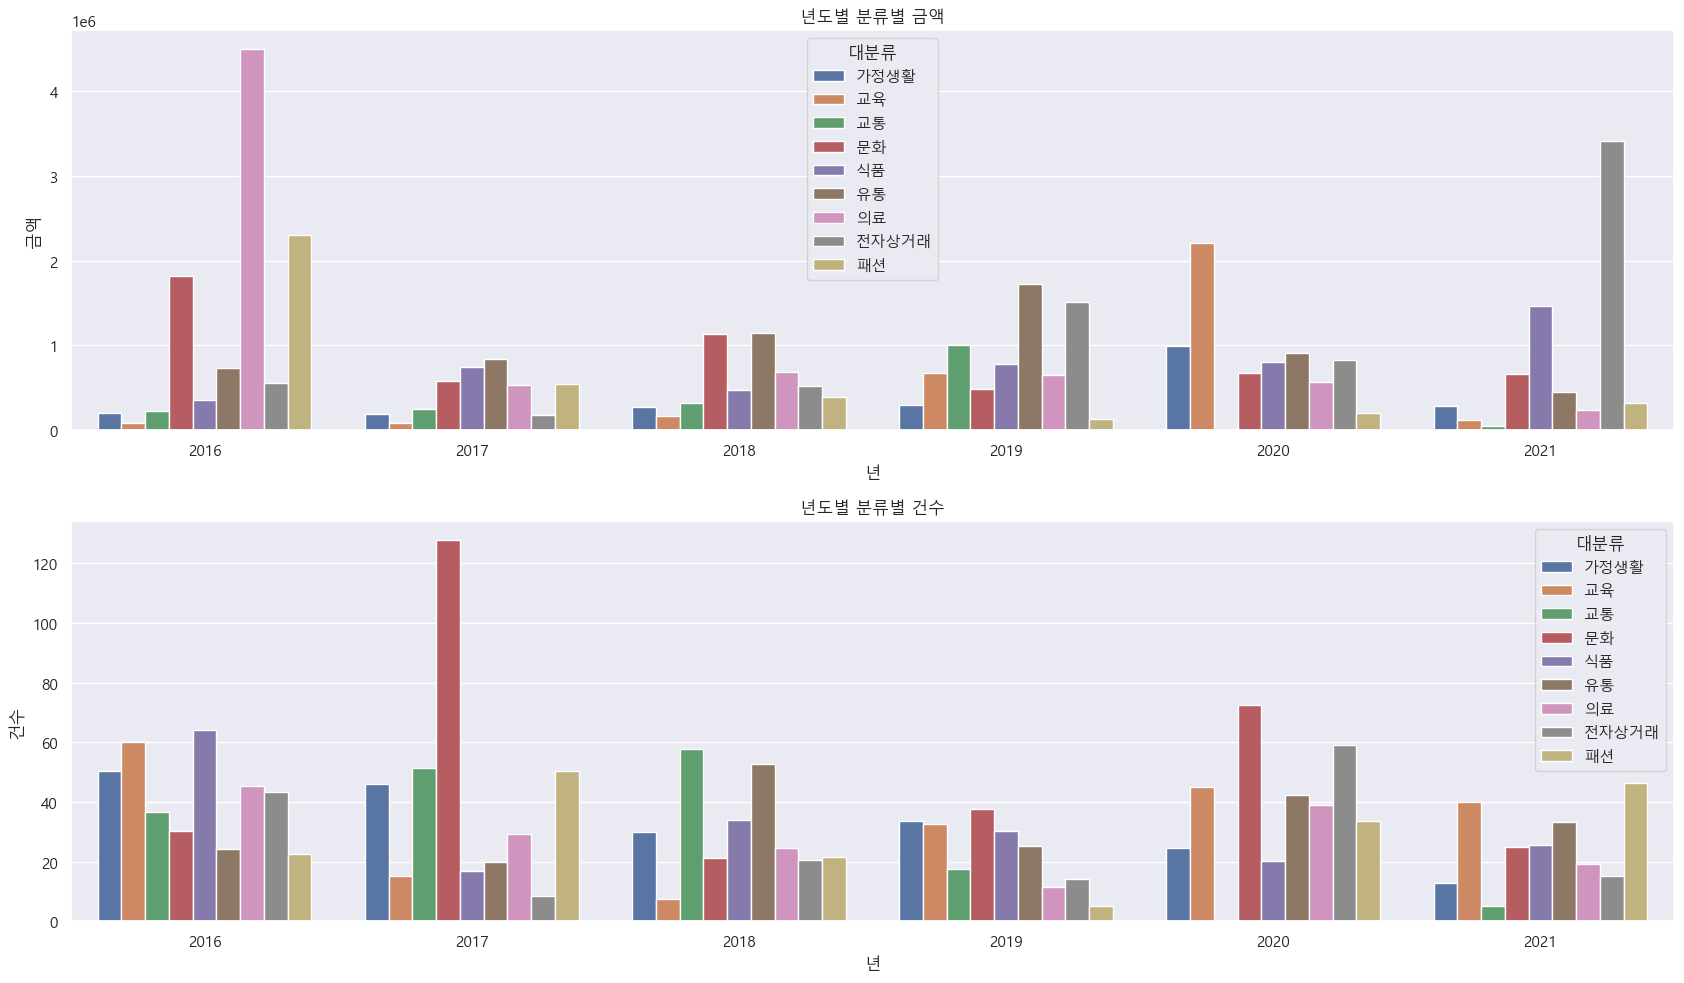

In [73]:
# 연도에 따른 연도별 금액, 건수 비교 차트 
# 2021년도에는 전자상거래를 큰금액 했지만 건수는 적음
# 전자상거래는 21년도에 크게 증가했음

# 2017년도에는 문화에 건수가 높지만 금액은 높지 않음
gdf = df.groupby(['년', '대분류'])[['금액', '건수']].mean().sort_index()
gdf = gdf.reset_index()

fig,axes = plt.subplots(2,1,figsize=(17,10))
sns.barplot(data=gdf, x='년', y="금액", hue='대분류',ax=axes[0]) 
axes[0].set_title('년도별 분류별 금액')

plt.subplot(2,1,2)
sns.barplot(data=gdf, x='년', y="건수", hue='대분류',ax=axes[1]) 
axes[1].set_title('년도별 분류별 건수')

plt.tight_layout()
plt.show()

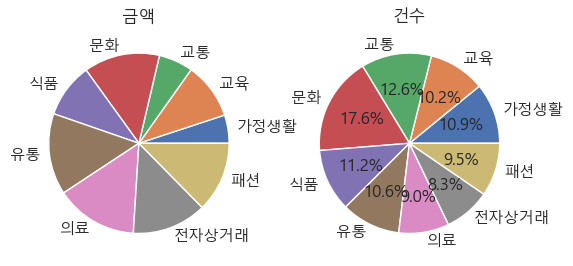

In [79]:
meandata = df.groupby('대분류')['금액'].mean()
ratio1 = meandata.values
labels1 = meandata.index.values

meandata2 = df.groupby('대분류')['건수'].mean()
ratio2 = meandata2.values
labels2 = meandata2.index.values

plt.subplot(1,2,1)
plt.title('금액')
plt.pie(ratio1, labels=labels1)
# autopct='%.1f%%'

plt.subplot(1,2,2)
plt.title('건수')
plt.pie(ratio2, labels=labels2, autopct='%.1f%%')

plt.show() 

### 건수

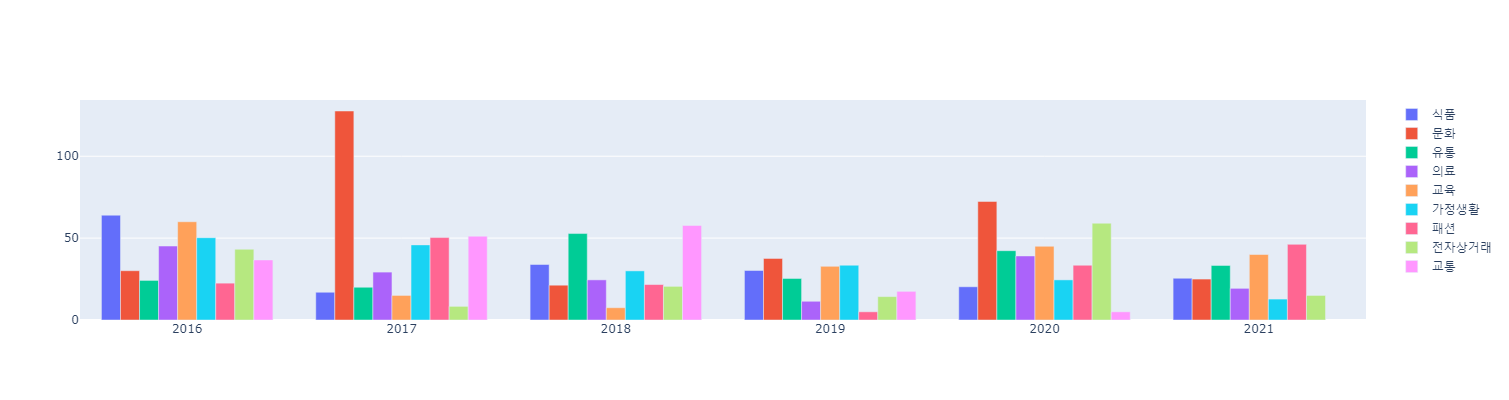

In [58]:
list_data=[]
for ca in df['대분류'].unique():
    dfdf = df[df['대분류']==ca].groupby('년').mean()
    data = go.Bar(x=df['년'].unique() ,y=dfdf['건수'], name=ca)
    list_data.append(data)
    
fig = go.Figure(data=list_data) # 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig.update_layout(width=1400, height=400)

# py.plot(fig, filename = 'year_cat_count') #-> 차트 plotly에 저장
fig.show()

In [139]:
dfdf = df[df['년']=='2016'].groupby(['년','대분류']).mean().reset_index()
dfdf

In [137]:
import plotly.graph_objs as go
import plotly.figure_factory as FF

dfdf = df[df['년']=='2016'].groupby('대분류').mean().reset_index()

fig = { "data": [{"values": dfdf['건수'],
                  "labels": df['대분류'].unique(),
                  "domain": {"x": [0, .48]},
                  "name": "대분류 건수",
                  "textinfo":"percent+label", "textfont": {'color': '#FFFFFF', 'size': 15},
                  "hole": .3,
                  "type": "pie" } ],
        "layout": {"title":"대분류 건수", "annotations": [{"font": { "size": 25,"color": '#5A5A5A'}, "showarrow": False,"text": "2016","x": 0.215, "y": 0.5}] }}

py.iplot(fig, filename='2016_cat_count')

### 금액

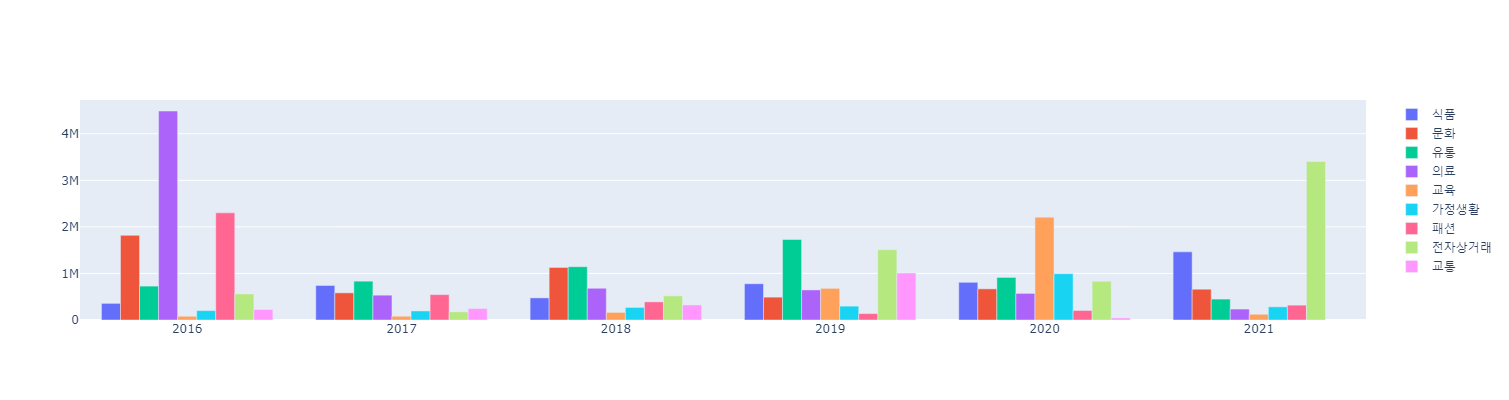

In [59]:
list_data=[]
for ca in df['대분류'].unique():
    dfdf = df[df['대분류']==ca].groupby('년').mean()
    data = go.Bar(x=df['년'].unique() ,y=dfdf['금액'], name=ca)
    list_data.append(data)
    
fig = go.Figure(data=list_data) # 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig.update_layout(width=1400, height=400)

# py.plot(fig, filename = 'year_cat_money') #-> 차트 plotly에 저장
fig.show()

In [134]:
dfdf = df[df['년']=='2016'].groupby(['년','대분류']).mean().reset_index()

fig = { "data": [{"values": dfdf['금액'],
                  "labels": df['대분류'].unique(),
                  "domain": {"x": [0, .48]},
                  "name": "대분류 금액",
                  "textinfo":"percent+label", "textfont": {'color': '#FFFFFF', 'size': 15},
                  "hole": .3,
                  "type": "pie" } ],
        "layout": {"title":"대분류 금액", "annotations": [{"font": { "size": 25,"color": '#5A5A5A'}, "showarrow": False,"text": "2016","x": 0.215, "y": 0.5}] }}

py.iplot(fig, filename='2016_cat_money')

---

## 연도별 성별 

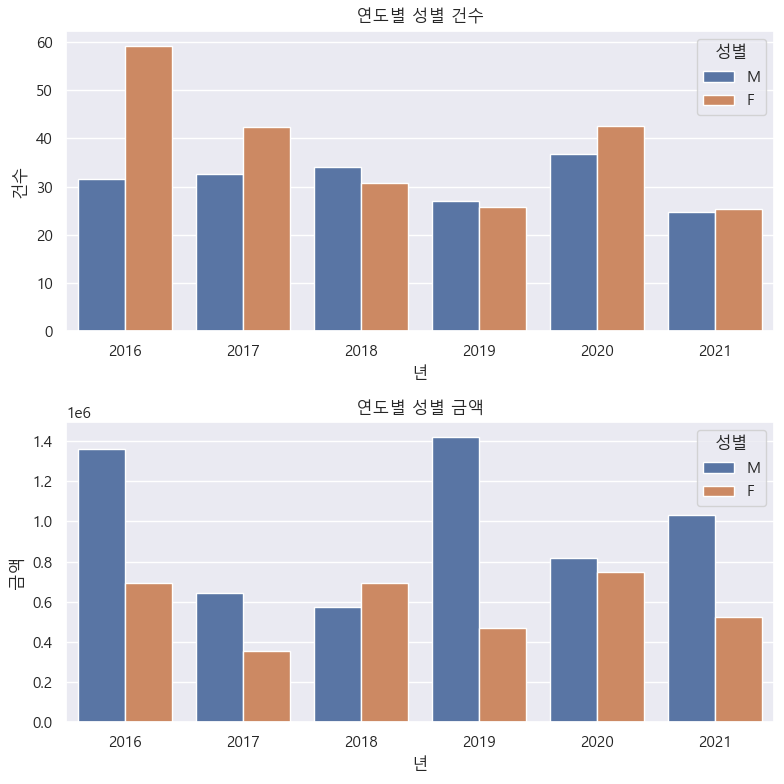

In [60]:
fig,axes = plt.subplots(2,1,figsize=(8,8))
sns.barplot(data=df.sort_values('년'), x='년', y='건수', estimator='mean',errorbar=None,ax=axes[0],hue='성별')
axes[0].set_title('연도별 성별 건수')

sns.barplot(data=df.sort_values('년'), x= '년', y='금액', estimator='mean', errorbar=None,ax=axes[1],hue='성별')
axes[1].set_title('연도별 성별 금액')

plt.tight_layout()
plt.show()

### 건수

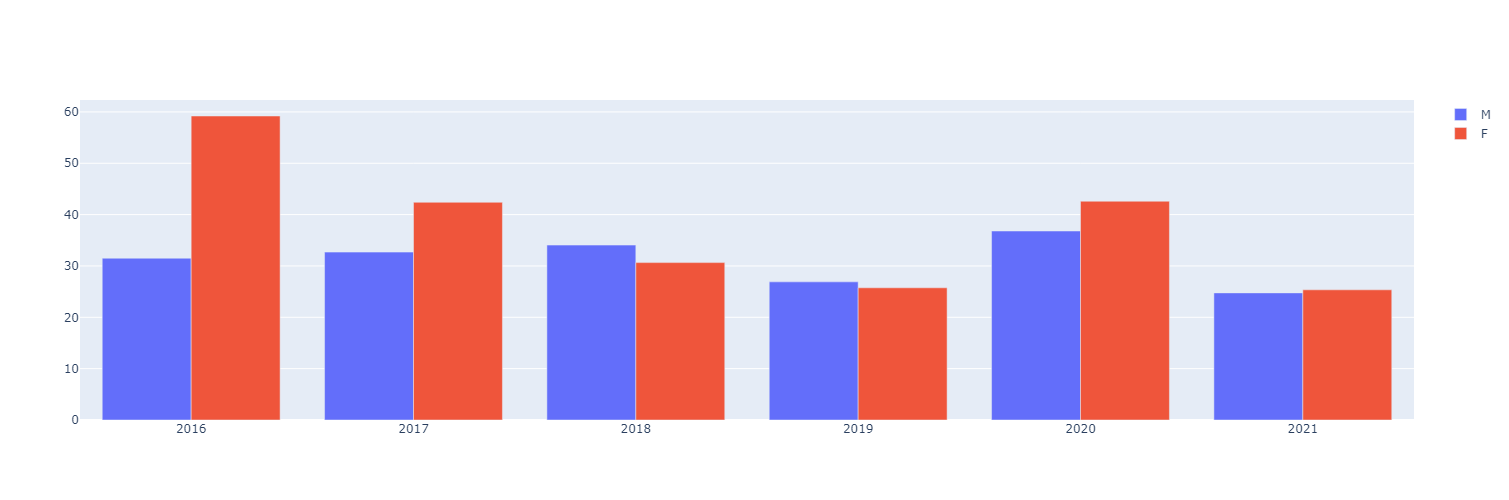

In [61]:
list_data=[]
for ca in df['성별'].unique():
    dfdf = df[df['성별']==ca].groupby('년').mean()
    data = go.Bar(x=df['년'].unique() ,y=dfdf['건수'], name=ca)
    list_data.append(data)
    
fig = go.Figure(data=list_data) # 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig.update_layout(width=800, height=500)

# py.plot(fig, filename = 'year_sex_count') #-> 차트 plotly에 저장
fig.show()

### 금액

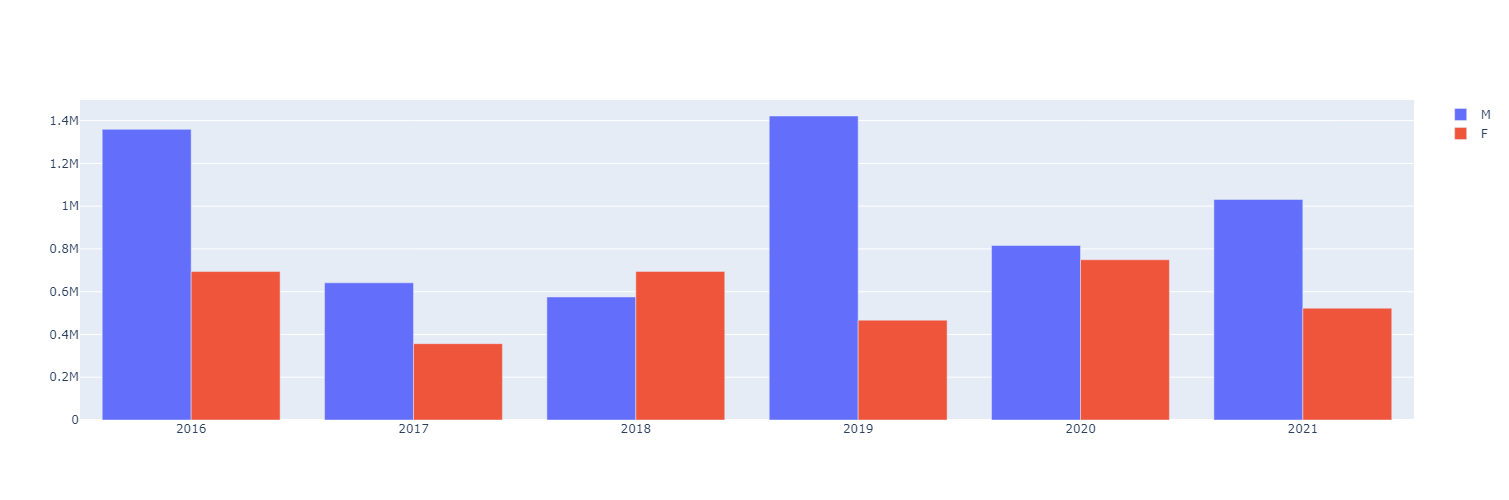

In [62]:
list_data=[]
for ca in df['성별'].unique():
    dfdf = df[df['성별']==ca].groupby('년').mean()
    data = go.Bar(x=df['년'].unique() ,y=dfdf['금액'], name=ca)
    list_data.append(data)
    
fig = go.Figure(data=list_data) # 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig.update_layout(width=800, height=500)

# py.plot(fig, filename = 'year_sex_money') #-> 차트 plotly에 저장
fig.show()

---

## 연도별 연령별 

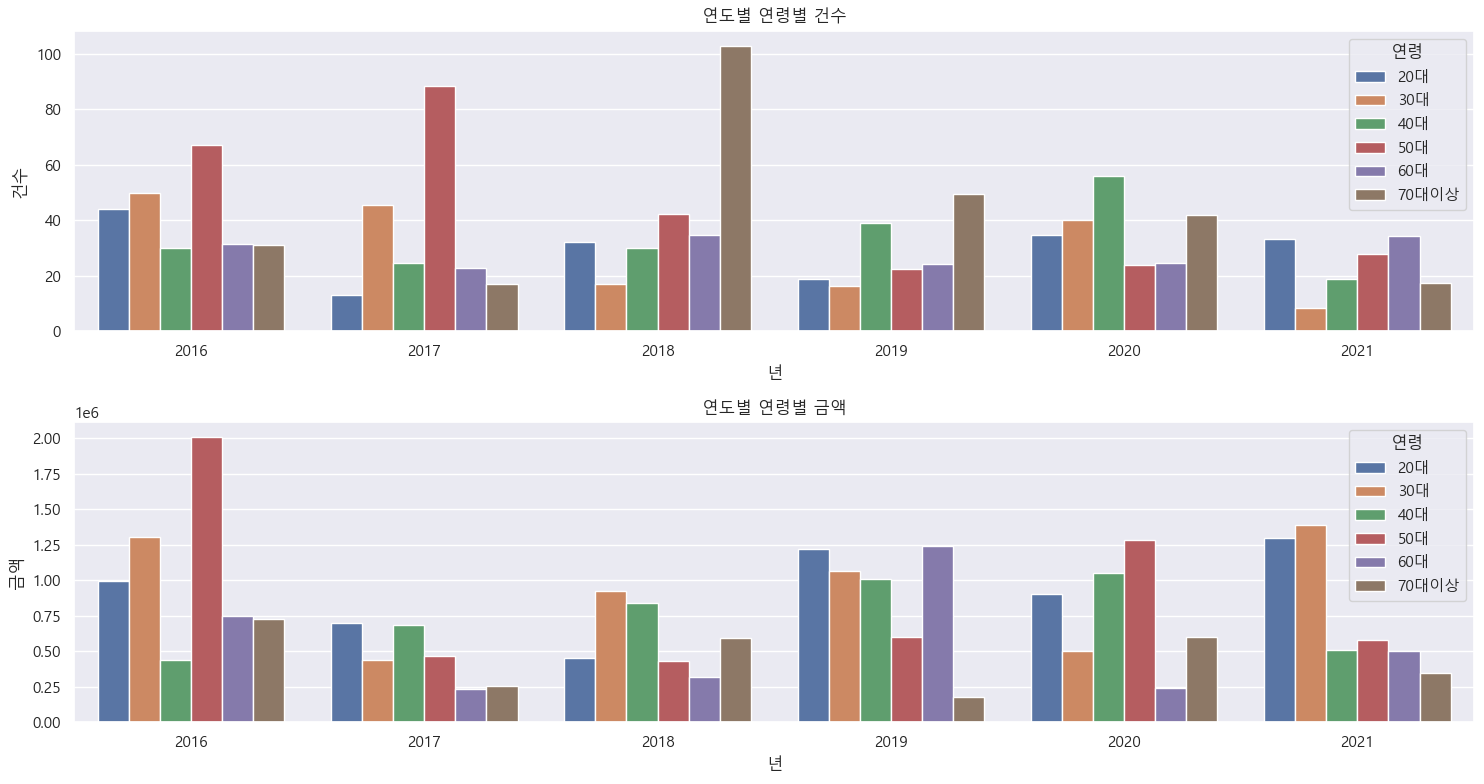

In [63]:
fig,axes = plt.subplots(2,1,figsize=(15,8))
sns.barplot(data=df.sort_values(['년','연령']), x='년', y='건수', estimator='mean',errorbar=None,ax=axes[0],hue='연령')
axes[0].set_title('연도별 연령별 건수')

sns.barplot(data=df.sort_values(['년','연령']), x= '년', y='금액', estimator='mean', errorbar=None,ax=axes[1],hue='연령')
axes[1].set_title('연도별 연령별 금액')

plt.tight_layout()
plt.show()

In [64]:
ddff=df['연령'].sort_values() # 정렬을 위해
ddff.unique()

array(['20대', '30대', '40대', '50대', '60대', '70대이상'], dtype=object)

### 건수

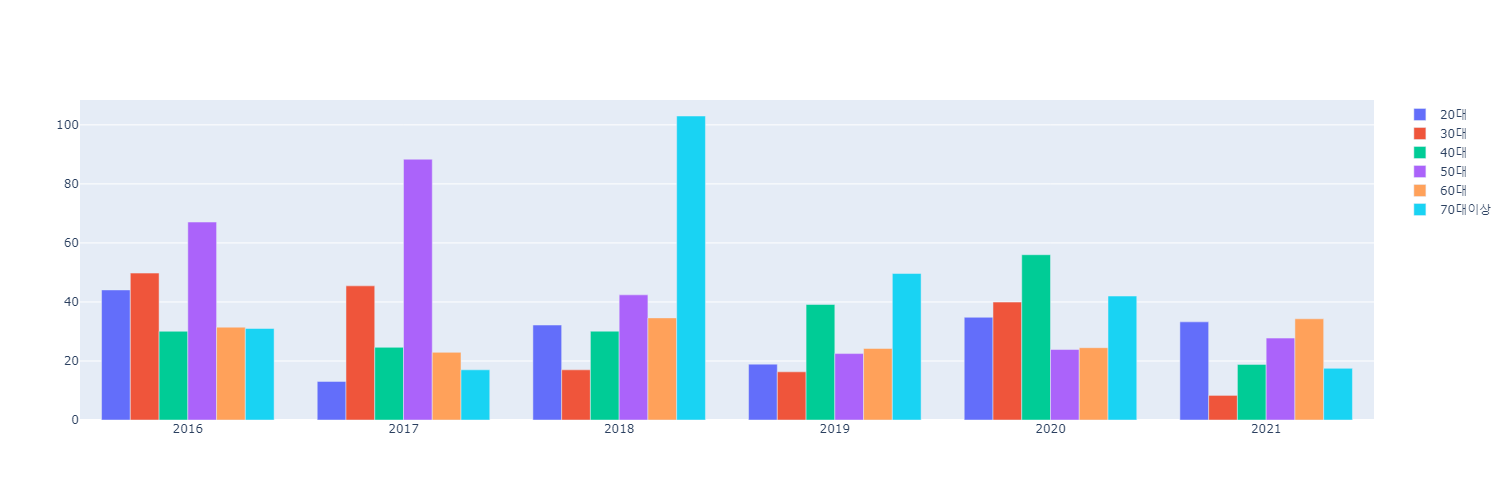

In [65]:
list_data=[]
for ca in ddff.unique():
    dfdf = df[df['연령']==ca].groupby('년').mean()
    data = go.Bar(x=df['년'].unique() ,y=dfdf['건수'], name=ca)
    list_data.append(data)
    
fig = go.Figure(data=list_data) # 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig.update_layout(width=1200, height=500)

# py.plot(fig, filename = 'year_age_count') #-> 차트 plotly에 저장
fig.show()

### 금액

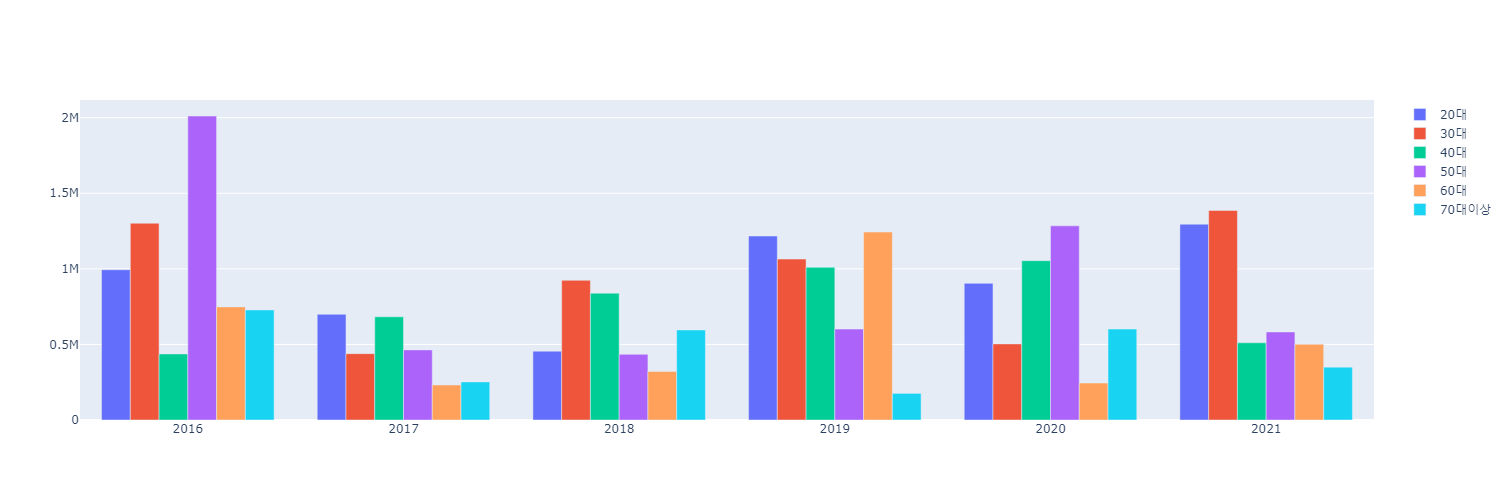

In [66]:
list_data=[]
for ca in ddff.unique():
    dfdf = df[df['연령']==ca].groupby('년').mean()
    data = go.Bar(x=df['년'].unique() ,y=dfdf['금액'], name=ca)
    list_data.append(data)
    
fig = go.Figure(data=list_data) # 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig.update_layout(width=1200, height=500)

# py.plot(fig, filename = 'year_age_money') #-> 차트 plotly에 저장
fig.show()

---

---

# 월별

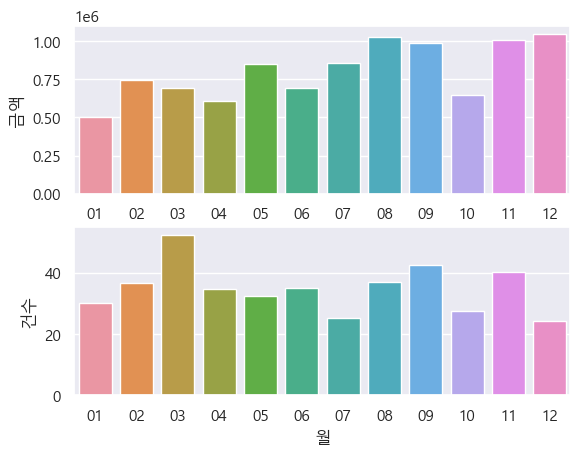

In [67]:
gdf = df.groupby('월')[['금액', '건수']].mean().sort_index()
gdf = gdf.reset_index()

plt.subplot(2,1,1)
sns.barplot(data=gdf, x='월', y="금액") 
plt.subplot(2,1,2)
sns.barplot(data=gdf, x='월', y="건수") 
plt.show()

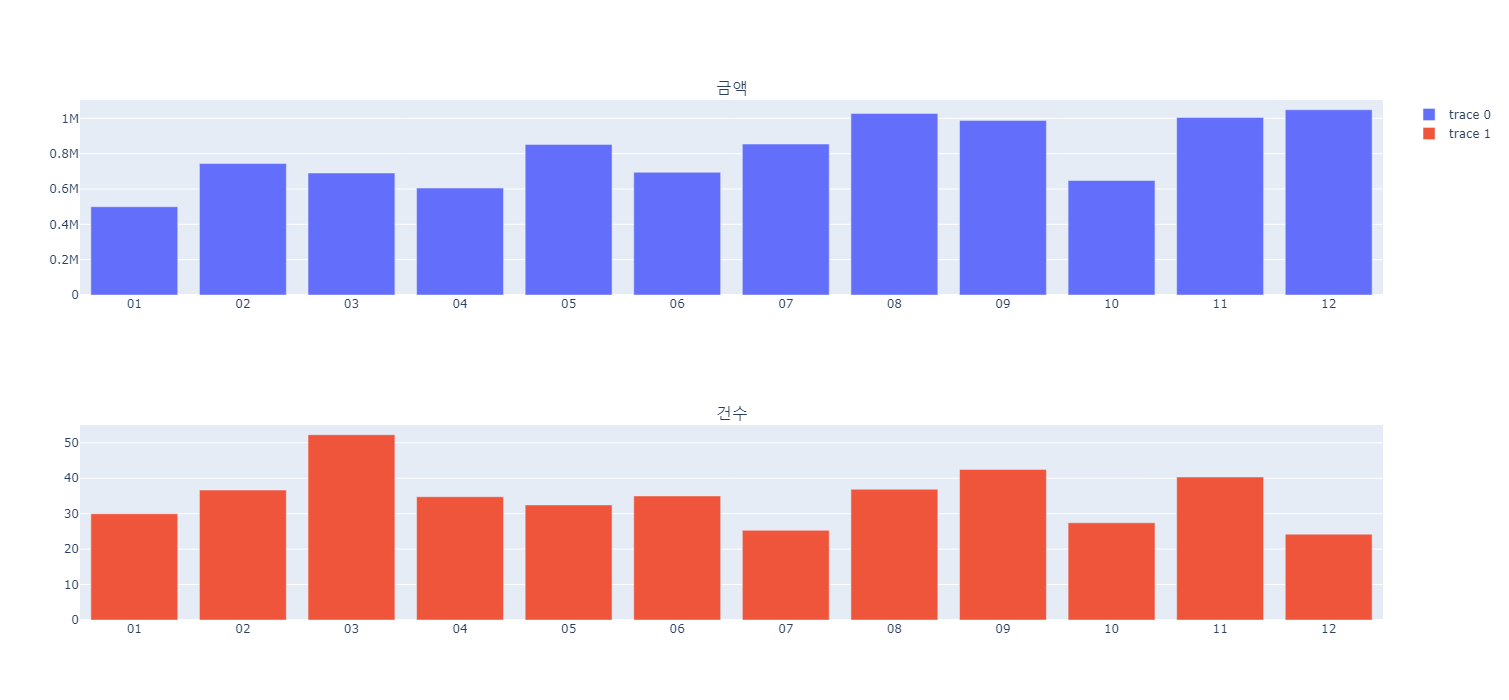

In [68]:
fig = make_subplots(rows=2, subplot_titles=['금액' , '건수'])

x_month = df['월'].unique()
y_data2 = df.groupby('월')['건수'].mean()
y_data = df.groupby('월')['금액'].mean()

fig.add_trace( go.Bar(x=x_month ,y=y_data),1, 1)
fig.add_trace( go.Bar(x=x_month, y=y_data2), 2,1)

fig.update_layout(width=650, height=700)

# py.plot(fig, filename = 'month_mc')
fig.show()

----

## 월별 대분류별

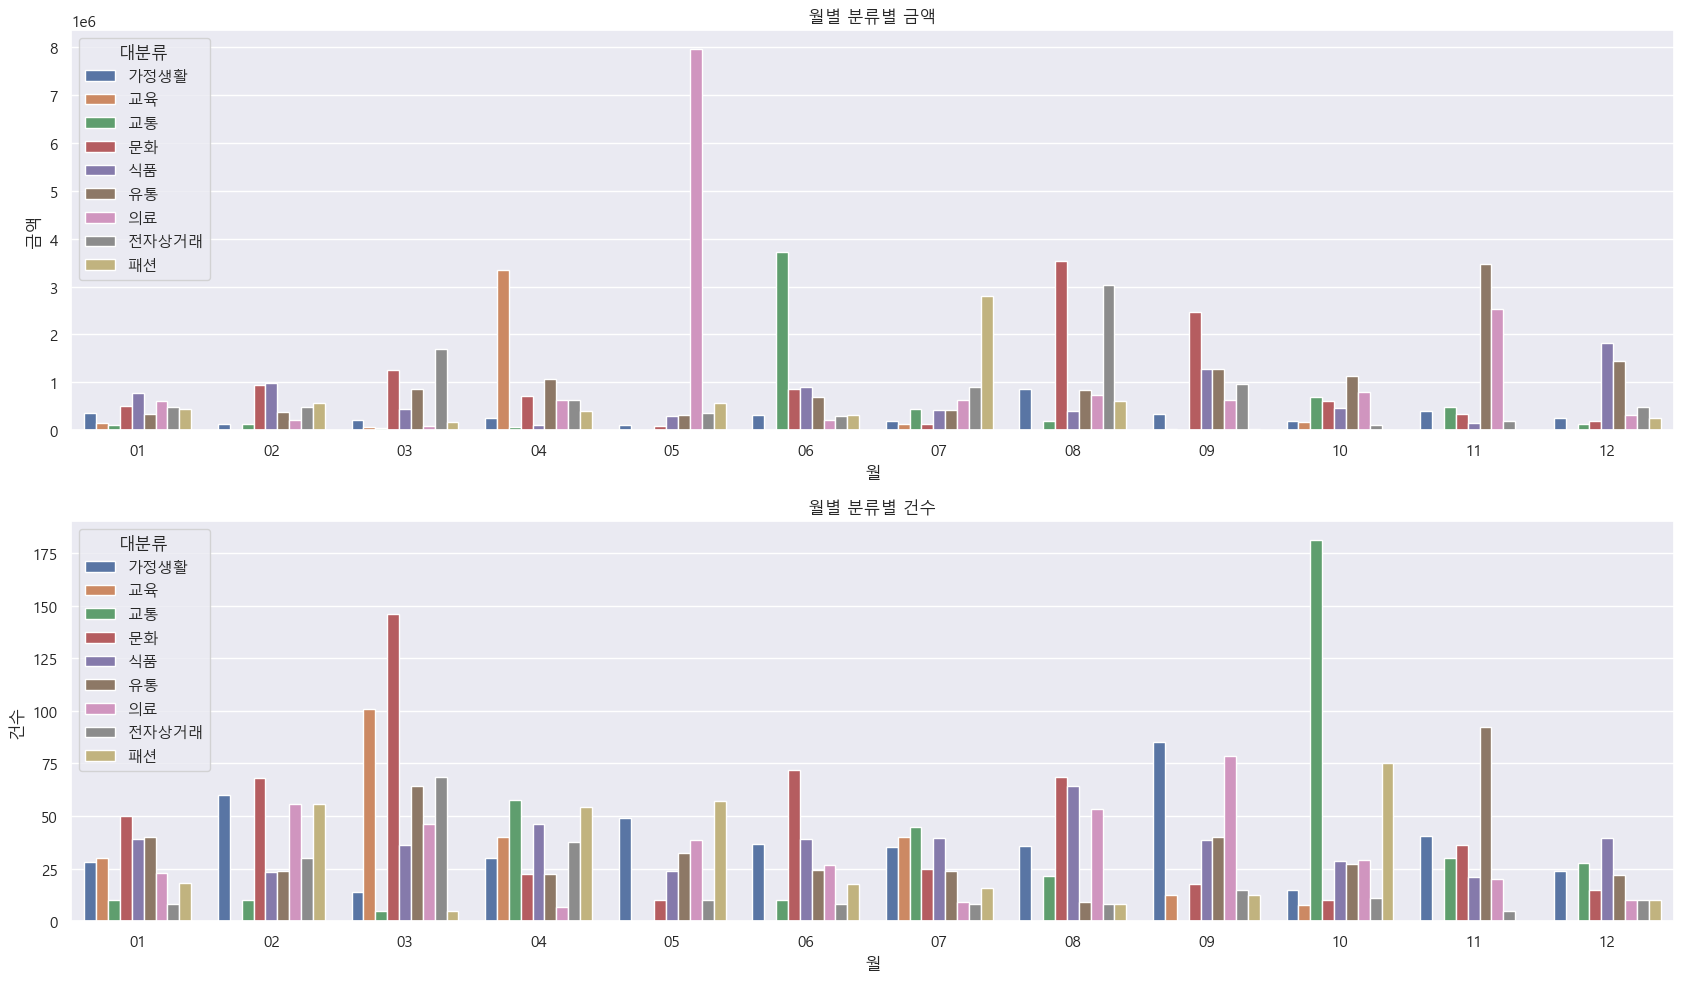

In [69]:
gdf = df.groupby(['월', '대분류'])[['금액', '건수']].mean().sort_index()
gdf = gdf.reset_index()

fig,axes = plt.subplots(2,1,figsize=(17,10))
sns.barplot(data=gdf, x='월', y="금액", hue='대분류',ax=axes[0]) 
axes[0].set_title('월별 분류별 금액')

plt.subplot(2,1,2)
sns.barplot(data=gdf, x='월', y="건수", hue='대분류',ax=axes[1]) 
axes[1].set_title('월별 분류별 건수')

plt.tight_layout()
plt.show()

---

## 월별 성별 

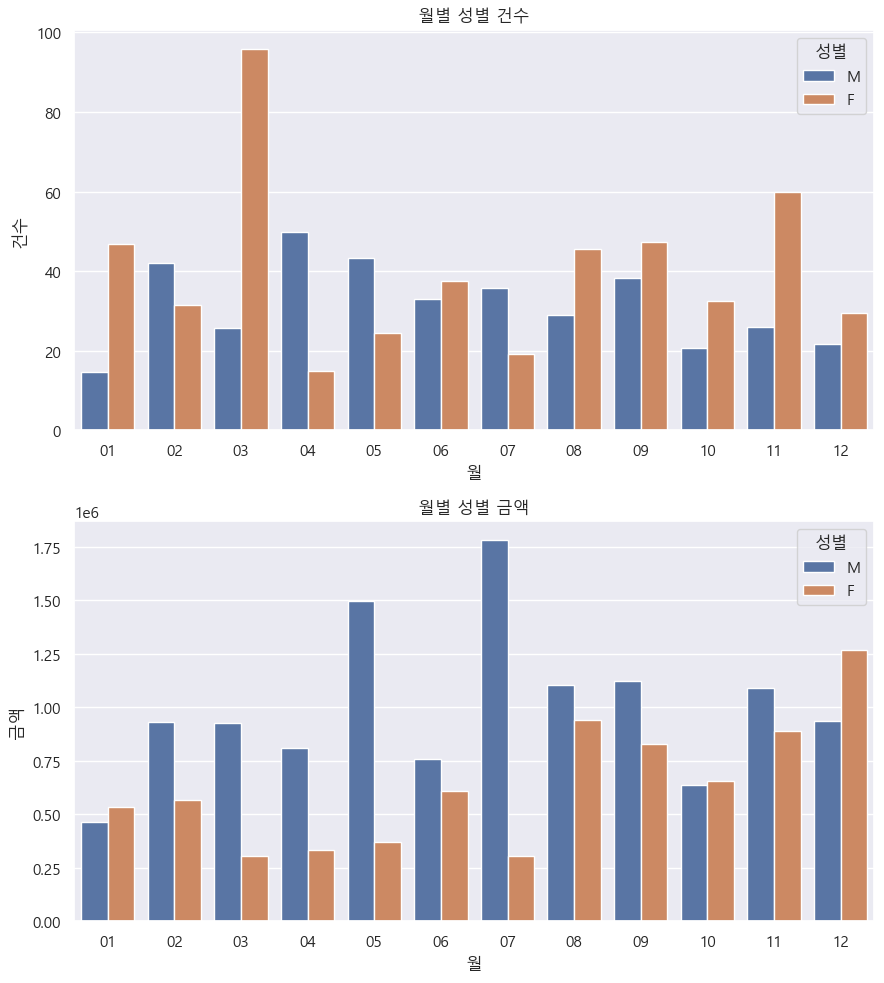

In [70]:
fig,axes = plt.subplots(2,1,figsize=(9,10))
sns.barplot(data=df.sort_values('월'), x='월', y='건수', estimator='mean',errorbar=None,ax=axes[0],hue='성별')
axes[0].set_title('월별 성별 건수')

sns.barplot(data=df.sort_values('월'), x= '월', y='금액', estimator='mean', errorbar=None,ax=axes[1],hue='성별')
axes[1].set_title('월별 성별 금액')

plt.tight_layout()
plt.show()

---

## 월별 연령별 

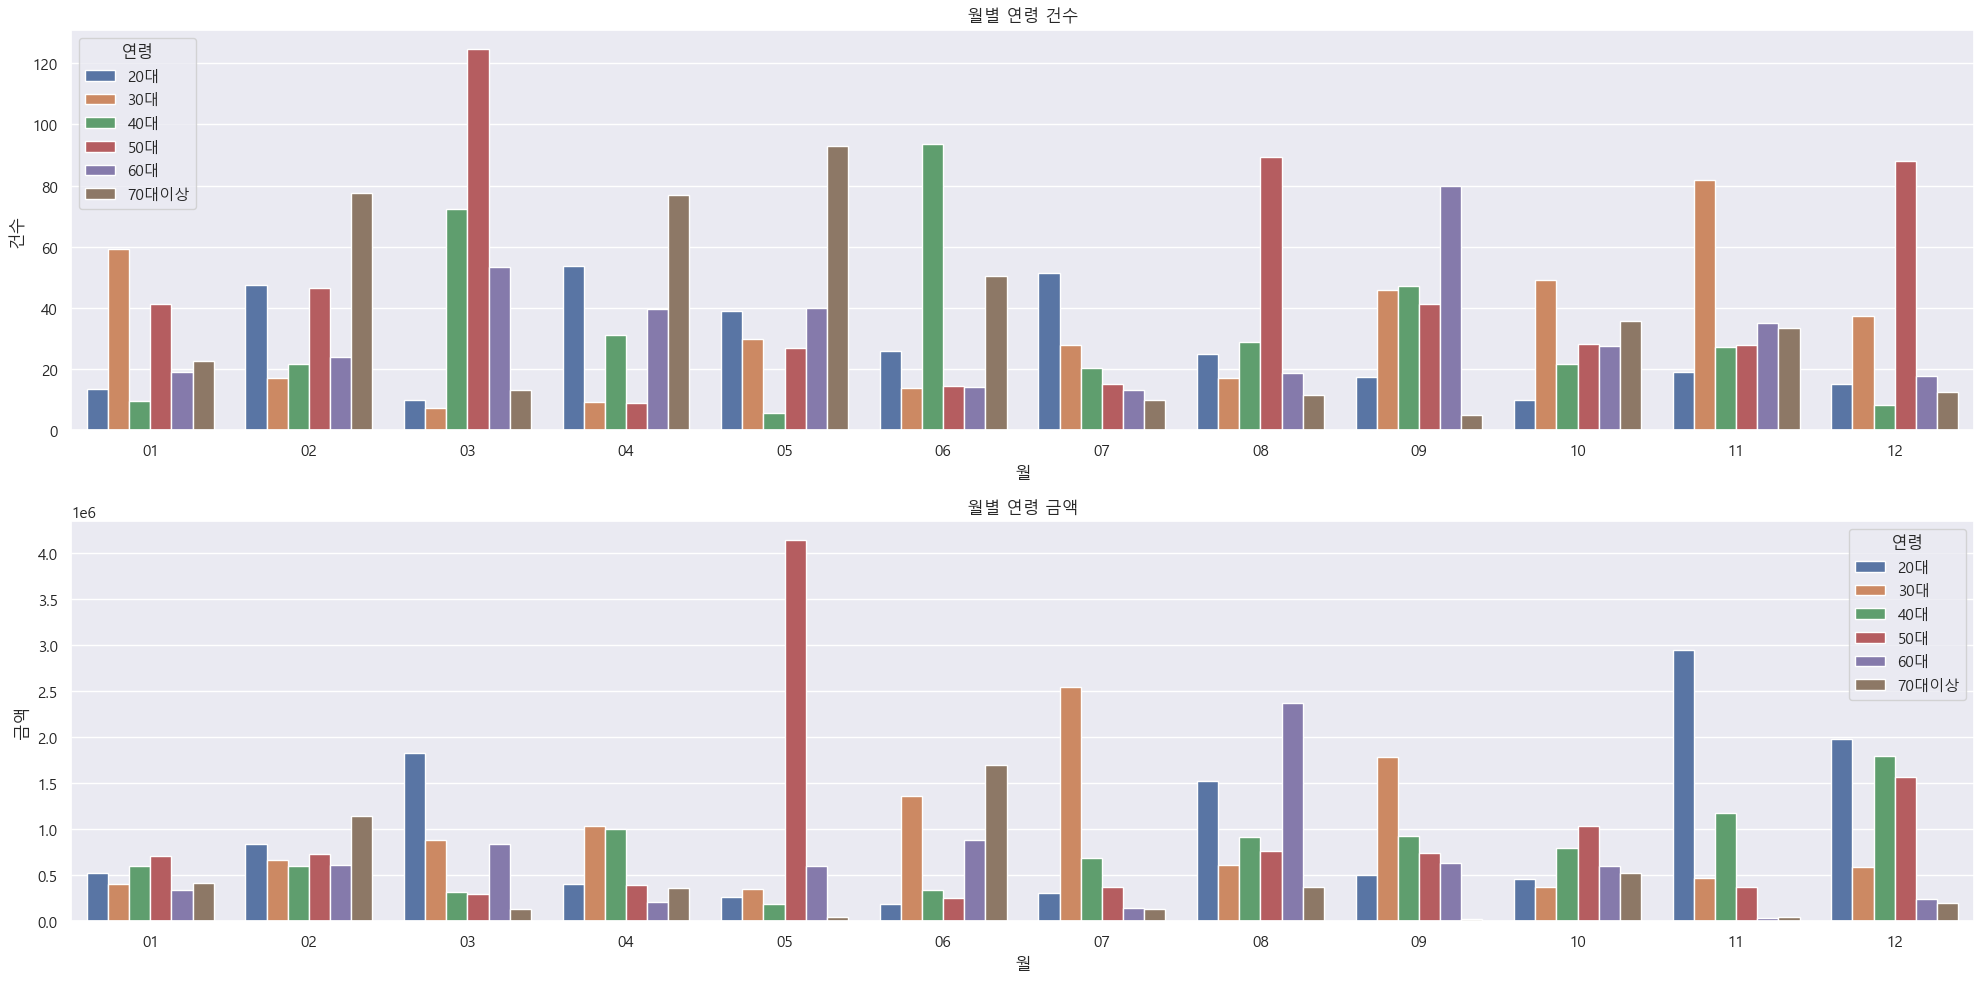

In [71]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.barplot(data=df.sort_values(['월','연령']), x='월', y='건수', estimator='mean',errorbar=None,ax=axes[0],hue='연령')
axes[0].set_title('월별 연령 건수')

sns.barplot(data=df.sort_values(['월','연령']), x= '월', y='금액', estimator='mean', errorbar=None,ax=axes[1],hue='연령')
axes[1].set_title('월별 연령 금액')

plt.tight_layout()
plt.show()

* 5월달 가정의달이라 50대 결제 금액이 늘어났다
* 3월달 새학기 시작 50대 건수가 늘어나고

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 9 to 480
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류     479 non-null    object
 1   중분류     479 non-null    object
 2   소분류     479 non-null    object
 3   성별      479 non-null    object
 4   연령      479 non-null    object
 5   년       479 non-null    object
 6   월       479 non-null    object
 7   금액      479 non-null    int64 
 8   건수      479 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 37.4+ KB
